In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
print(len(train_labels))

60000


In [32]:
train_images[0].shape

(28, 28)

In [33]:
test_images.shape

(10000, 28, 28)

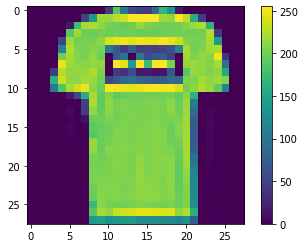

In [34]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
train_images = train_images / 255.0
test_images = test_images / 255.0

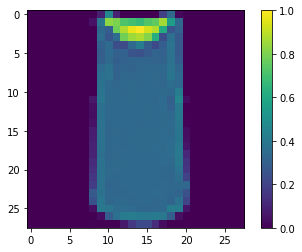

In [36]:
plt.figure()
plt.imshow(train_images[2])
plt.grid(False)
plt.colorbar()
plt.show()

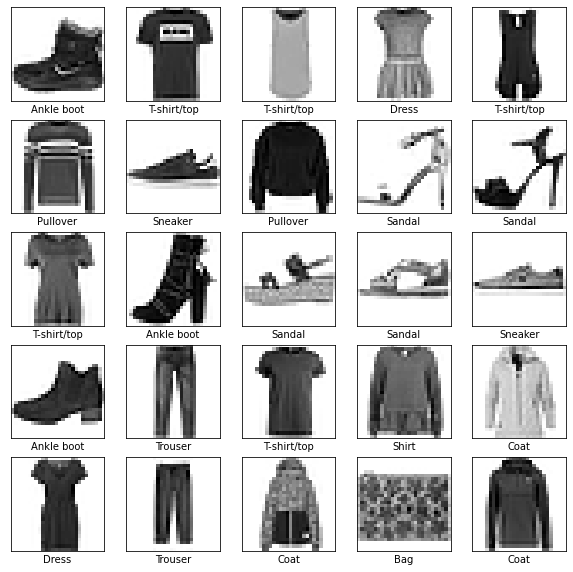

In [37]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) # cmap gives color for example cmap = plt.cm.Blues
  plt.xlabel(class_names[train_labels[i]])

plt.show()


# Build the model
###### Building the neural network requires configuring the layers of the model, then compiling the model.

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Flatten(input_shape = (28,28)),
                          layers.Dense(128, activation = 'relu'),
                          layers.Dense(128, activation = 'relu'),
                          layers.Dense(128, activation = 'relu'),
                          layers.Dense(10)])

# compile the model

In [39]:
model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # The from_logits=True attribute inform the loss function that the output values generated by the model are not normalized
              metrics = ['accuracy'])

# Train the model

In [40]:
model.fit(train_images, train_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4892 - accuracy: 0.8229
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3638 - accuracy: 0.8674
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3308 - accuracy: 0.8780
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3102 - accuracy: 0.8837
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2924 - accuracy: 0.8908
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2768 - accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.8993
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9049
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2442 - accuracy: 0.9082
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.233

# Evaluate Accuracy

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # verbose can be 0,1,2 use 2 generally,try it to see the difference
print('\n Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3439 - accuracy: 0.8882

 Test accuracy: 0.8881999850273132


**In testing the accuracy is less then the accuracy in training this is because **

overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting



https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting


# Making Predictions

In [42]:
probability_model = keras.Sequential([model, layers.Softmax()])

In [43]:
predictions = probability_model.predict(test_images)

In [44]:
predictions[1]

array([2.7631689e-04, 8.1392054e-10, 9.9872369e-01, 1.3039371e-06,
       2.2546369e-04, 2.5311611e-10, 7.7317742e-04, 2.9854007e-18,
       6.4859444e-11, 8.7102505e-14], dtype=float32)

In [45]:
np.argmax(predictions[1])

2

In [46]:
test_labels[1]

2

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

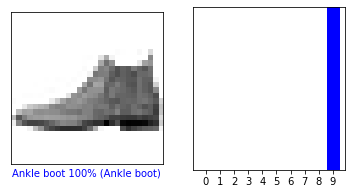

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

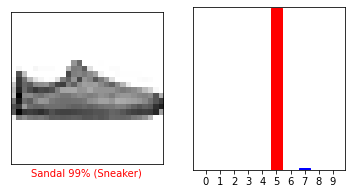

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

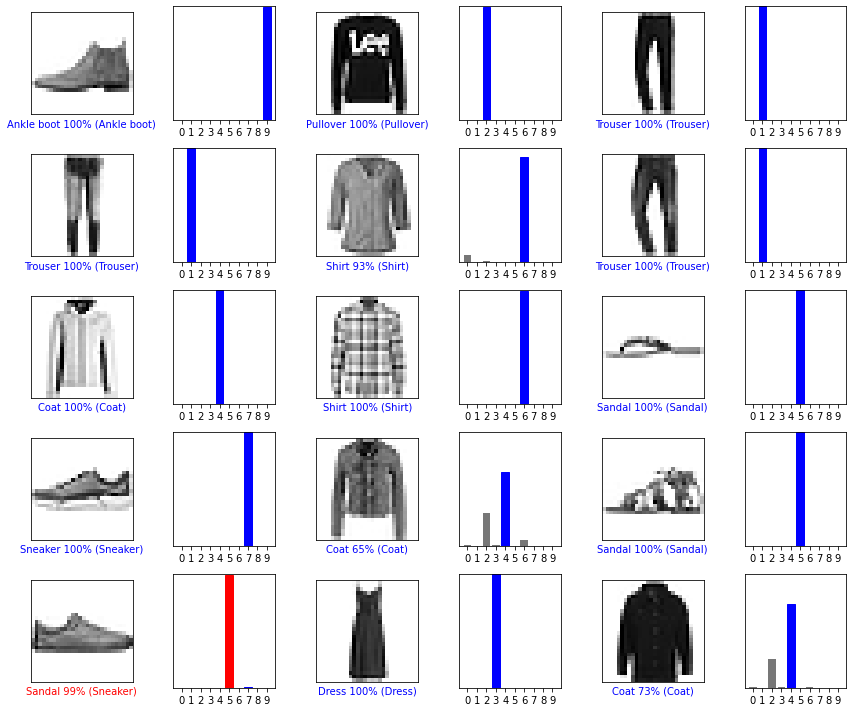

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) 
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model
##### for single prediction

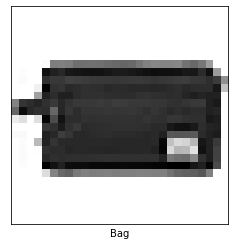

In [51]:
i = 58
image_1 = test_images[i]
plt.figure()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image_1, cmap = plt.cm.binary)
plt.xlabel(class_names[test_labels[i]])
plt.show()

In [52]:
print(image_1.shape)

(28, 28)


In [53]:
img = (np.expand_dims(image_1, 0))
print(img.shape)

(1, 28, 28)


In [54]:
prediction_single = probability_model(img)

In [55]:
print(prediction_single)

tf.Tensor(
[[9.22199703e-08 4.68251577e-13 1.08041104e-10 6.97524856e-14
  7.13686055e-11 8.34662917e-09 1.28980053e-08 2.46436982e-10
  9.99999881e-01 9.90524773e-10]], shape=(1, 10), dtype=float32)


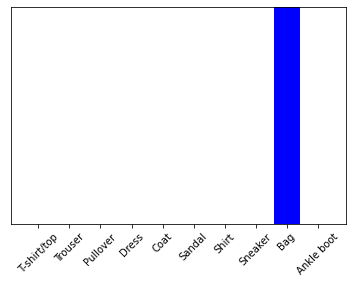

In [56]:
plot_value_array(i, prediction_single[0], test_labels)
_=plt.xticks(range(10), class_names, rotation = 45)